This notebook takes the serious, death, hospital, life-threatening, disabling subsets of the df_ML and clusters them via unsupervised learning into representative groups. It can then return a recommendation of stuff to avoid.

In [2]:
import pandas as pd
import numpy as np

In [5]:
# model_x_y refers to x input dataset (rows) and y feature set (cols)
df_ML_name = 'df_ML_model_1_1.csv'
model_filename = 'progress/modeling/cluster_1_2.pkl'
entries_filename = 'progress/modeling/entries_1_3.txt'
# test_out
test_out = 'serious'
text_row_num = 1654

# Get the filtered df
df_ML_name = 'progress/modeling/' + df_ML_name
df_cluster = pd.read_csv(df_ML_name, index_col = 0)
# filter based on outcome of interest
df_cluster = df_cluster[df_cluster[test_out] == 1]
# drop the other ones
drop_cols = ['serious', 'seriousness_congential_anomali', 'seriousness_death', 
              'seriousness_disabling', 'seriousness_hospitalization', 
              'seriousness_lifethreatening', 'seriousness_other']
df_cluster = df_cluster.drop(drop_cols, axis = 1)
# print it out
df_cluster.head()

,ABACAVIR,ABACAVIR SULFATE,ACETAMINOPHEN AND CODEINE,ADENOSINE,ALCOHOL,ALENDRONATE SODIUM,ALISKIREN HEMIFUMARATE AN,ALUMINUM HYDROXIDE AND MA,AMLODIPINE BESYLATE AND V,ANTI-THYMOCYTE GLOBULIN (,...,PREGNANCY,PRODUCT ISSUES,PSYCHIATRIC DISORDERS,RENAL AND URINARY DISORDERS,REPRODUCTIVE SYSTEM AND BREAST DISORDERS,RESPIRATORY,SKIN AND SUBCUTANEOUS TISSUE DISORDERS,SOCIAL CIRCUMSTANCES,SURGICAL AND MEDICAL PROCEDURES,VASCULAR DISORDERS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


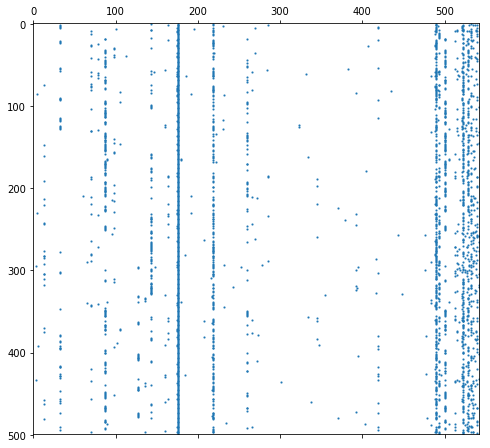

In [6]:
# Visualize the sparsity of the matrix
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (8,8))
axs.spy(df_cluster.head(500), markersize=1)
plt.show()

### Get the paradigmatic patients

In [4]:
from sklearn.cluster import KMeans

/home/spwhite1337/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [5]:
# Set up a KMeans model with 10 paradigmatic patients
clus = KMeans(n_clusters = 10, random_state = 189)

In [6]:
# fit the model
clus.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=189, tol=0.0001, verbose=0)

In [7]:
# get the centers
patient_centers = clus.cluster_centers_

In [8]:
# get the labels
pd.Series(clus.predict(df_cluster)).value_counts()

0    14676
3     6093
9     2514
4     2190
6      990
5      770
1      719
8      181
7      179
2       19
dtype: int64

In [9]:
# What paradigmatic patient are you most similar to?
test_row = np.asarray(df_cluster.iloc[text_row_num,:])
test_label = clus.predict(test_row.reshape(1,-1))
print('Most similar to patient number: {a}'.format(a = test_label[0]))

Most similar to patient number: 0


In [10]:
# How can you keep your distance?
# Get most similar paradigmatic patient
# When the test_row is zero, what features of the patient cluster vector are highest?
arr = patient_centers[test_label[0]][np.where(test_row == 0)]
df_cluster.columns[arr.argsort()[-10:][::-1]]

Index(['Nasal', 'GASTROINTESTINAL STENOSIS AND OBSTRUCTION',
       'SALIX ALBA WHOLE', 'SPLEEN', 'MINOCYCLINE', 'BRIMONIDINE TARTRATE',
       'NEPHROPATHIES', 'ENDOCRINE INVESTIGATIONS (INCL SEX HORMONES)',
       'Intra-amniotic', 'Periarticular'],
      dtype='object')

In [12]:
# Save the model
#import pickle
#with open(model_filename, "wb") as fp:   #Pickling
#    pickle.dump(clus, fp)

### Get recommendations from clusters

In [29]:
# open up the df for features
df = pd.read_csv('./progress/modeling/df_ML_model_1_3.csv', index_col = 0)
entries = list(df.columns)
entries

['ABACAVIR',
 'ABACAVIR SULFATE',
 'ACETAMINOPHEN AND CODEINE',
 'ADENOSINE',
 'ALCOHOL',
 'ALENDRONATE SODIUM',
 'ALISKIREN HEMIFUMARATE',
 'ALUMINUM HYDROXIDE AND MA',
 'AMLODIPINE BESYLATE AND B',
 'ANTI-THYMOCYTE GLOBULIN (',
 'ANTIFUNGAL POWDER SPRAY',
 'ANTIFUNGAL SPRAY LIQUID',
 'ASPIRIN',
 'ASPIRIN AND CAFFEINE',
 'ATHLETES FOOT SPRAY',
 'ATORVASTATIN CALCIUM',
 'ATROPA BELLADONNA',
 'AVOBENZONE OCTISALATE OCT',
 'AZITHROMYCIN DIHYDRATE',
 'BETHANECHOL CHLORIDE 50 M',
 'BOSENTAN',
 'BRIMONIDINE TARTRATE',
 'BUPIVACAINE HYDROCHLORIDE',
 'CALCITRIOL',
 'CALCIUM CARBONATE',
 'CANDESARTAN CILEXETIL AND',
 'CARBAMIDE PEROXIDE',
 'CEFIXIME',
 'CHLOROTHIAZIDE',
 'CHLORPHENIRAMINE MALEATE',
 'CHORIONIC GONADOTROPIN',
 'CIDOFOVIR ANHYDROUS',
 'CIMETIDINE',
 'CITALOPRAM',
 'CITALOPRAM TABLETS',
 'CLINDAMYCIN PHOSPHATE AND',
 'CLONIDINE HYDROCHLORIDE',
 'CLOPIDOGREL BISULFATE',
 'CODEINE PHOSPHATE',
 'CONJUGATED ESTROGENS',
 'CORN AND CALLUS REMOVER',
 'CYANOCOBALAMIN',
 'CYCLOBENZAPRINE 

In [30]:
# save the feature set
#import pickle
#with open(entries_filename, "wb") as fp:
#    pickle.dump(entries, fp)

In [32]:
# open the feature set
with open(entries_filename, "rb") as fp:
    entries_1_1 = pickle.load(fp)

In [38]:
# maximum 10 features of non-zero entries in input
max_feats = arr.argsort()[-10:][::-1]
# converted to features
recommends = [entries_1_1[i] for i in max_feats]
recommends